In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CSV dataset file name
file_name = 'D2.csv'

In [3]:
# Please put csv file in the same folder with this jupyter notebook
df_prep = pd.read_csv(file_name)

In [4]:
print(df_prep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

# 1. Pre-processing

### a. Check Invalid values

In [5]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
def checkInvalidValue(value):
    print('**********************************')
    print(f'Checking for missing ' + value)
    for col in df_prep.columns:
        if df_prep[col].dtype == object:
            print(col,df_prep[col][df_prep[col] == value].count())

In [6]:
checkInvalidValue('?')
checkInvalidValue('NaN')
checkInvalidValue('Unknown/Invalid')


**********************************
Checking for missing ?
race 0
gender 0
age 0
medical_specialty 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
insulin 0
**********************************
Checking for missing NaN
race 0
gender 0
age 0
medical_specialty 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
insulin 0
**********************************
Checking for missing Unknown/Invalid
race 0
gender 0
age 0
medical_specialty 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
insulin 0


### b. Variables

###### Create a new collumn name medchange to record the changing in 10 drugs that have correlation to diabetes patient readmission
###### No, Steady: 0
###### Yes: 1

In [7]:
variables = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'insulin']
for col in variables:
    colname = str(col) + 'temp'
    df_prep[colname] = df_prep[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df_prep['medchange'] = 0
for col in variables:
    colname = str(col) + 'temp'
    df_prep['medchange'] = df_prep['medchange'] + df_prep[colname]
    del df_prep[colname]
    
df_prep['medchange'].value_counts()  

0    13610
1     6085
2      279
3       26
Name: medchange, dtype: int64

Encoding some category variables to numeric values

In [8]:
df_prep['change'] = df_prep['change'].replace(True, 1)
df_prep['change'] = df_prep['change'].replace(False, 0)
df_prep['gender'] = df_prep['gender'].replace('Male', 1)
df_prep['gender'] = df_prep['gender'].replace('Female', 0)
df_prep['diabetesMed'] = df_prep['diabetesMed'].replace(True, 1)
df_prep['diabetesMed'] = df_prep['diabetesMed'].replace(False, 0)

# Medicine change
for col in variables:
    df_prep[col] = df_prep[col].replace('No', 0)
    df_prep[col] = df_prep[col].replace('Steady', 1)
    df_prep[col] = df_prep[col].replace('Up', 1)
    df_prep[col] = df_prep[col].replace('Down', 1)

Mapping values for A1Cresult, max_glu_serum to numeric values

In [9]:
df_prep['A1Cresult'] = df_prep['A1Cresult'].replace('>7', 1)
df_prep['A1Cresult'] = df_prep['A1Cresult'].replace('>8', 1)
df_prep['A1Cresult'] = df_prep['A1Cresult'].replace('Norm', 0)
df_prep['A1Cresult'] = df_prep['A1Cresult'].replace('None', -99)
df_prep['max_glu_serum'] = df_prep['max_glu_serum'].replace('>200', 1)
df_prep['max_glu_serum'] = df_prep['max_glu_serum'].replace('>300', 1)
df_prep['max_glu_serum'] = df_prep['max_glu_serum'].replace('Norm', 0)
df_prep['max_glu_serum'] = df_prep['max_glu_serum'].replace('None', -99)

Age mapping

In [10]:
# mapping
age_map = {'[0-10)':1, '[10-20)':2, '[20-30)':3, '[30-40)':4, '[40-50)':5, '[50-60)':6, '[60-70)':7, '[70-80)':8, '[80-90)':9, '[90-100)':10}
#print(age_map)
df_prep['age'] = df_prep['age'].map(age_map)
print(df_prep['age'].unique())

[ 9  8  6  5  7 10  4  2  3  1]


In [11]:
# mapping
race_map = {'AfricanAmerican':1, 'Asian':2, 'Caucasian':3, 'Hispanic':4, 'Other':5}
#print(age_map)
df_prep['race'] = df_prep['race'].map(race_map)
print(df_prep['race'].unique())

[1 3 5 2 4]


Consider dropping for medical_specialty for missing a lot of information, and it may not affect to our predictive model. 
Dropping race because it doesn't help in predictive model

In [12]:
df_prep = df_prep.drop(['medical_specialty'], axis = 1)

In [13]:
df_prep.head().T

,0,1,2,3,4
race,1,3,3,1,1
gender,0,0,0,0,1
age,9,8,6,6,9
admission_type_id,1,1,3,1,1
discharge_disposition_id,3,3,1,1,3
admission_source_id,7,5,1,7,7
time_in_hospital,1,3,3,6,4
num_lab_procedures,33,48,25,41,22
num_procedures,0,2,1,0,0
num_medications,14,7,15,19,12


In [14]:
df_prep.dtypes

race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
insulin                     int64
change                      int64
diabetesMed                 int64
readmitted                  int64
medchange     

In [15]:
from sklearn.model_selection import train_test_split

def data_prep(df_prep):
    # one-hot encoding
    df = pd.get_dummies(df_prep)
    
    # target/input split
    y = df['readmitted']
    X = df.drop(['readmitted'], axis=1)

    # setting random state
    rs = 10

    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
    
    return df,X,y,X_train, X_test, y_train, y_test

In [16]:
df,X,y,X_train, X_test, y_train, y_test = data_prep(df_prep)
print(df)

       race  gender  age  admission_type_id  discharge_disposition_id  \
0         1       0    9                  1                         3   
1         3       0    8                  1                         3   
2         3       0    6                  3                         1   
3         1       0    6                  1                         1   
4         1       1    9                  1                         3   
...     ...     ...  ...                ...                       ...   
19995     1       1    8                  2                         1   
19996     3       1    6                  1                         3   
19997     3       1    9                  1                         6   
19998     4       1    6                  1                         6   
19999     3       0    9                  2                         1   

       admission_source_id  time_in_hospital  num_lab_procedures  \
0                        7                 1           

In [17]:
X_mat = X.to_numpy()

# 2. Predictive model

### a. Data partitioning

In [18]:
# setting random state
rs = 10

X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [20]:
# Based on version to see model description
model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [21]:
# Not good train accuracy, too perfect
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 0.9999285714285714


In [22]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.5538333333333333


In [23]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      3203
           1       0.52      0.53      0.53      2797

    accuracy                           0.55      6000
   macro avg       0.55      0.55      0.55      6000
weighted avg       0.55      0.55      0.55      6000



# b. Decision Tree

#### Visualising decision tree structure

In [24]:
#retrain with a small max_depth limit
model_default = DecisionTreeClassifier(random_state=rs)
model_default.fit(X_train, y_train)
print("Train accuracy:", model_default.score(X_train, y_train))
print("Test accuracy:", model_default.score(X_test, y_test))
y_pred = model_default.predict(X_test)
print(classification_report(y_test, y_pred))


Train accuracy: 0.9999285714285714
Test accuracy: 0.5538333333333333
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      3203
           1       0.52      0.53      0.53      2797

    accuracy                           0.55      6000
   macro avg       0.55      0.55      0.55      6000
weighted avg       0.55      0.55      0.55      6000



In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [26]:
dtree.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [48]:
print(dtree.tree_.node_count)

209


In [53]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [59]:
rules = get_rules(dtree, df.columns, df['readmitted'])
rule_count = 0
for r in rules:
    rule_count += 1
    print(r)

if (number_inpatient <= 0.5) and (number_outpatient <= 0.5) and (diabetesMed > 0.5) and (age > 7.5) and (admission_source_id > 6.5) and (discharge_disposition_id <= 6.5) and (num_medications > 4.5) then class: 1 (proba: 52.39%) | based on 1,613 samples
if (number_inpatient > 0.5) and (number_inpatient <= 1.5) and (discharge_disposition_id <= 7.5) and (admission_type_id <= 2.5) and (num_medications > 11.5) and (num_medications <= 40.5) and (num_lab_procedures > 10.5) then class: 1 (proba: 59.19%) | based on 1,377 samples
if (number_inpatient <= 0.5) and (number_outpatient <= 0.5) and (diabetesMed > 0.5) and (age <= 7.5) and (number_emergency <= 0.5) and (num_medications > 12.5) and (num_procedures > 0.5) then class: 1 (proba: 66.53%) | based on 1,261 samples
if (number_inpatient > 0.5) and (number_inpatient > 1.5) and (discharge_disposition_id <= 10.0) and (number_inpatient <= 3.5) and (number_outpatient <= 6.5) and (number_emergency <= 0.5) and (max_glu_serum <= -49.5) then class: 1 (p

In [60]:
print(f'Number of rules: {rule_count}')

Number of rules: 105


In [27]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(dtree, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())

In [28]:
graph[0].write_png('diabetes_viz.png') # saved in the following file - will return True if successful

In [29]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', importances[i])

# In desc order, top 5 important variables: num_lab_procedures, num_medications, time_in_hospital, discharge_disposition_id, age

num_lab_procedures : 0.17516482853375803
num_medications : 0.1407621624355572
time_in_hospital : 0.09030503366835341
discharge_disposition_id : 0.06830001937760397
number_inpatient : 0.06765109260003073
age : 0.06612623171664327
number_diagnoses : 0.05342778308187068
num_procedures : 0.04874274302036164
admission_type_id : 0.029368046932213898
race : 0.025630455299108325
gender : 0.023732998714803697
admission_source_id : 0.023152703983873108
number_emergency : 0.022675617252210404
A1Cresult : 0.022229831467112313
number_outpatient : 0.02137294661788548
medchange : 0.017145416780784108
glipizide : 0.017136787856036968
change : 0.015936776624719835
insulin : 0.015536932359792826
metformin : 0.014320401953348985


### GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)


{'mean_fit_time': array([0.00698969, 0.00756326, 0.00540078, 0.01106958, 0.01158538,
       0.0150537 , 0.01625648, 0.01411495, 0.01831512, 0.01531613,
       0.01411569, 0.01573446, 0.02046597, 0.02300358, 0.02202654,
       0.01881545, 0.02452421, 0.02002206, 0.02121284, 0.02731252,
       0.02616439, 0.02585397, 0.02957366, 0.02949402, 0.03170364,
       0.01887374, 0.03298783, 0.03142569, 0.02990041, 0.03361833,
       0.03023627, 0.03260624, 0.0313077 , 0.03512247, 0.03651929,
       0.04303484, 0.04450347, 0.04691799, 0.0370647 , 0.03754733,
       0.03596222, 0.04037101, 0.0394875 , 0.04040895, 0.04277954,
       0.03954108, 0.04242208, 0.04060676, 0.0452816 , 0.05029509,
       0.04702048, 0.04717898, 0.04869261, 0.04918411, 0.05222263,
       0.05241516, 0.05353656, 0.05318124, 0.04919753, 0.0473736 ,
       0.00720515, 0.0078764 , 0.01074286, 0.00945015, 0.00943892,
       0.01067996, 0.0108943 , 0.011025  , 0.01796632, 0.01404927,
       0.0157439 , 0.0197664 , 0.02201564, 0

In [32]:
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


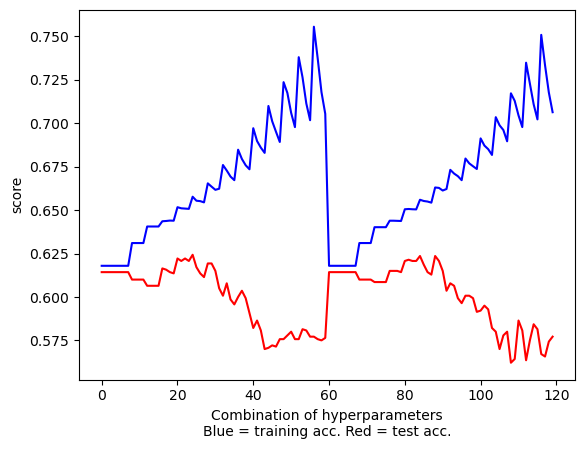

In [33]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

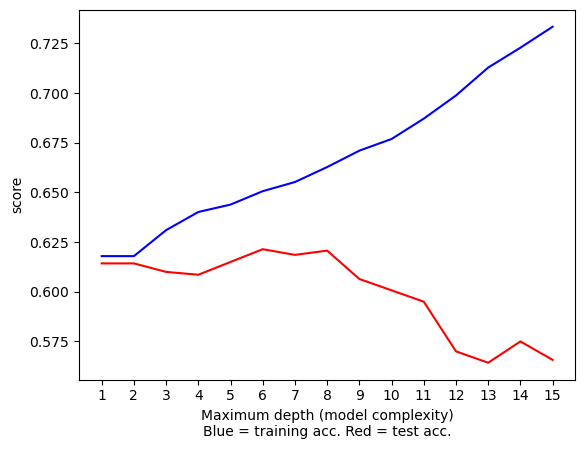

In [34]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

The right choice should be the parameter after which the test accuracy starts to decrease but the training accuracy keeps improving. Therefore, the `maximum_depth = 2` is the right choice here. 

In [35]:
print(cv_1.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}


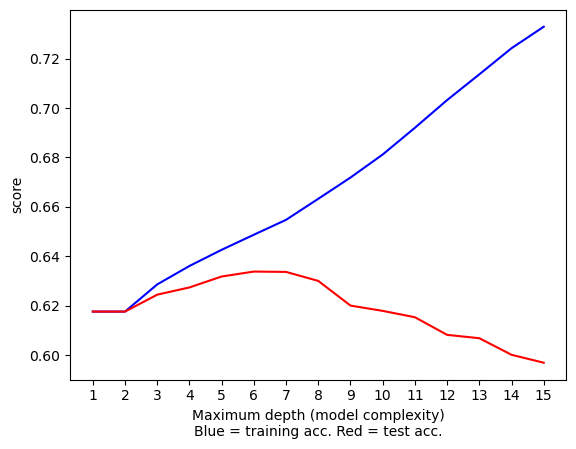

In [36]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In the above figure, `max_depth = 7` has the highest accuracy on average for all the splits. This shows how GridSearchCV finds `max_depth = 7` as the best hyperparameter that avoids overfitting.

Similarly, GridSearchCV finds the best hyperparameters for `criterion` and `min_sample_leaves`.


In [37]:
cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.6572857142857143
Test accuracy: 0.6306666666666667


### d. Fit decision tree with max depth 7 from GridSearchCV

In [63]:
#retrain with a small max_depth limit
model_2 = DecisionTreeClassifier(max_depth=7, random_state=rs)
model_2.fit(X_train, y_train)
print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6606428571428572
Test accuracy: 0.62
              precision    recall  f1-score   support

           0       0.64      0.67      0.65      3203
           1       0.60      0.57      0.58      2797

    accuracy                           0.62      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.62      0.62      0.62      6000



In [69]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', importances[i])

# In desc order, top 5 important variables: num_lab_procedures, num_medications, time_in_hospital, discharge_disposition_id, age

num_lab_procedures : 0.17516482853375803
num_medications : 0.1407621624355572
time_in_hospital : 0.09030503366835341
discharge_disposition_id : 0.06830001937760397
number_inpatient : 0.06765109260003073
age : 0.06612623171664327
number_diagnoses : 0.05342778308187068
num_procedures : 0.04874274302036164
admission_type_id : 0.029368046932213898
race : 0.025630455299108325
gender : 0.023732998714803697
admission_source_id : 0.023152703983873108
number_emergency : 0.022675617252210404
A1Cresult : 0.022229831467112313
number_outpatient : 0.02137294661788548
medchange : 0.017145416780784108
glipizide : 0.017136787856036968
change : 0.015936776624719835
insulin : 0.015536932359792826
metformin : 0.014320401953348985


In [70]:
dtree_2 = DecisionTreeClassifier(max_depth=7, criterion = "entropy", min_samples_split=10)
dtree_2.fit(X_train, y_train)
dtree_2.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [71]:
# visualize
dotfile = StringIO()
export_graphviz(dtree_2, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())

In [72]:
graph[0].write_png('diabetes_viz_2.png') # saved in the following file - will return True if successful

In [73]:
print(dtree_2.tree_.node_count)

209


In [74]:
rules = get_rules(dtree_2, df.columns, df['readmitted'])
rule_count_2 = 0
for r in rules:
    rule_count_2 += 1
    print(r)

if (number_inpatient <= 0.5) and (number_outpatient <= 0.5) and (diabetesMed > 0.5) and (age > 7.5) and (admission_source_id > 6.5) and (discharge_disposition_id <= 6.5) and (num_medications > 4.5) then class: 1 (proba: 52.39%) | based on 1,613 samples
if (number_inpatient > 0.5) and (number_inpatient <= 1.5) and (discharge_disposition_id <= 7.5) and (admission_type_id <= 2.5) and (num_medications > 11.5) and (num_medications <= 40.5) and (num_lab_procedures > 10.5) then class: 1 (proba: 59.19%) | based on 1,377 samples
if (number_inpatient <= 0.5) and (number_outpatient <= 0.5) and (diabetesMed > 0.5) and (age <= 7.5) and (number_emergency <= 0.5) and (num_medications > 12.5) and (num_procedures > 0.5) then class: 1 (proba: 66.53%) | based on 1,261 samples
if (number_inpatient > 0.5) and (number_inpatient > 1.5) and (discharge_disposition_id <= 10.0) and (number_inpatient <= 3.5) and (number_outpatient <= 6.5) and (number_emergency <= 0.5) and (max_glu_serum <= -49.5) then class: 1 (p

In [75]:
print(f'Number of rules: {rule_count} of max_depth 7')

Number of rules: 105 of max_depth 7


# d. ROC

In [43]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.4081336238198983 	 0.5918663761801016 	 1
0.6337448559670782 	 0.3662551440329218 	 0
0.6653449643140364 	 0.3346550356859635 	 0
0.5833333333333334 	 0.4166666666666667 	 0
0.6653449643140364 	 0.3346550356859635 	 0
0.4081336238198983 	 0.5918663761801016 	 1
0.32052483598875353 	 0.6794751640112465 	 1
0.8979591836734694 	 0.10204081632653061 	 0
0.5238685678859268 	 0.47613143211407316 	 1
0.6987270155586988 	 0.3012729844413013 	 0
0.5238685678859268 	 0.47613143211407316 	 0
0.6323529411764706 	 0.36764705882352944 	 0
0.5238685678859268 	 0.47613143211407316 	 1
0.6323529411764706 	 0.36764705882352944 	 0
0.6337448559670782 	 0.3662551440329218 	 0
0.6987270155586988 	 0.3012729844413013 	 0
0.6337448559670782 	 0.3662551440329218 	 0
0.5238685678859268 	 0.4761

The ROC AUC score aims to find the best model under the varied threshold values. To compute the ROC AUC score, use the code below.

In [44]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model_default.predict_proba(X_test)

y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])

roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)

print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.5526081030353314
ROC index on test for DT_optimal: 0.6661960302455989


In [45]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
#fpr_dt_small, tpr_dt_small, thresholds_dt_small = roc_curve(y_test, y_pred_proba_dt_small[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

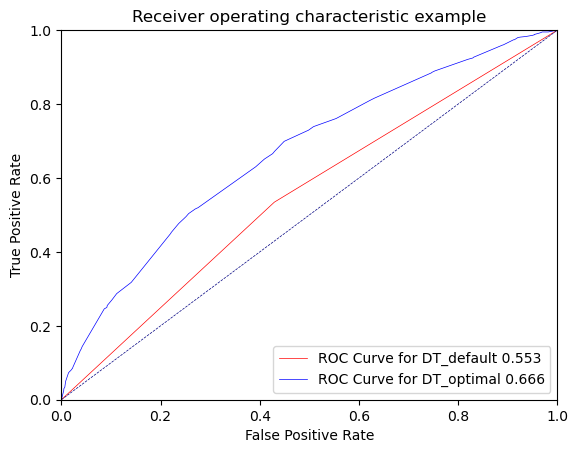

In [46]:
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The DT with GridSearchCV (`DT_CV`) shows the largest curve area compared to the DT with default settings (`DT`). Thus `DT_CV` is the best performing model.

In [47]:
# Saving ROC
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)